# Predicting housing prices

Regression attempts to predict one dependent variable (usually denoted by *Y*) and a series of other changing variables (known as independent variables, usually denoted by *X*).

Let's start by importing the libraries needed:


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
from scipy import stats
%matplotlib inline

Next let us import and check out the data.

In [6]:
USAhousing = pd.read_csv('USA_Housing.csv')
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05


Now its time to play around with the data and create some visualizations.

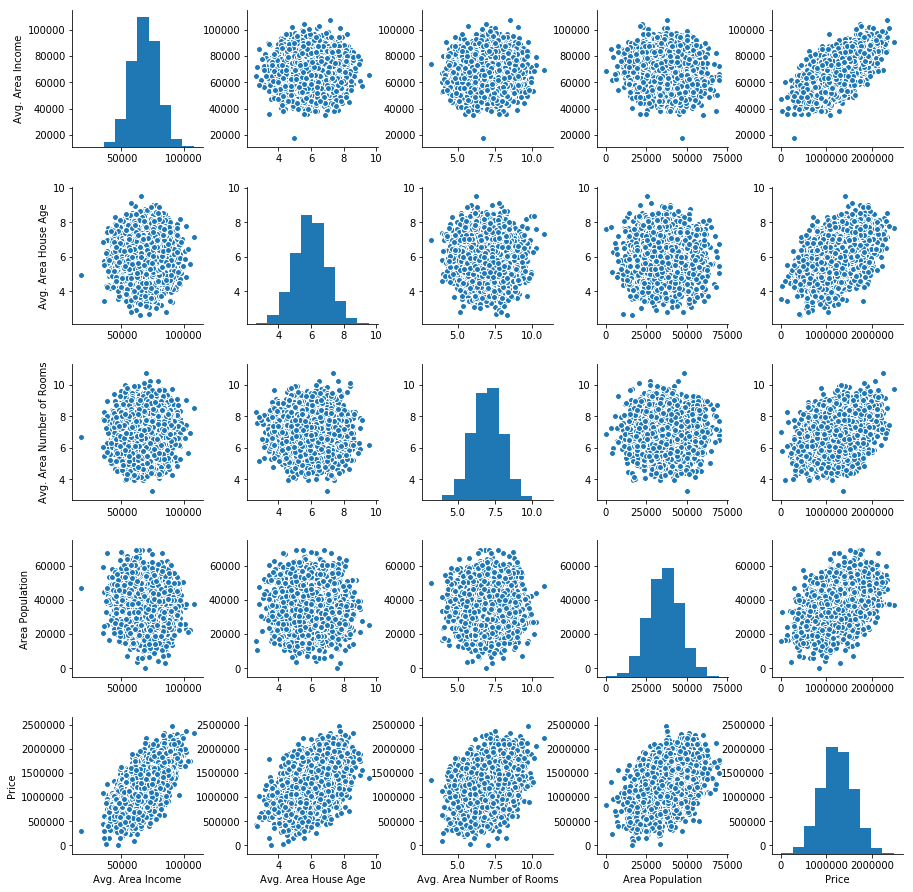

In [7]:
sns.pairplot(USAhousing)

## Calculating correlation
Now that we have a dataset, we can calculate correlation between different features. 
The correlation coefficient, or simply the correlation, is an index that ranges from -1 to 1. When the value is near zero, there is no linear relationship. As the correlation gets closer to plus or minus one, the relationship is stronger. A value of one (or negative one) indicates a perfect linear relationship between two variables.

The formula for correlation between x and y:
$$Correlation = \frac{Cov(x,y)}{\sigma_x \sigma_y}$$

Let us try to calculate the correlation coefficients between the features 'Price' and 'Area Population' in our housing dataset. How much do these two have in common? Let's find out

In [8]:
#First we calculate the variance of USAhousing
variance = np.var(USAhousing)
print(variance)


Avg. Area Income             1.135701e+08
Avg. Area House Age          9.827888e-01
Avg. Area Number of Rooms    1.011498e+00
Area Population              9.849883e+07
Price                        1.246671e+11
dtype: float64


Since we want to find out the correlation between 'Price' and 'Area Population', we fill these in for $x$ and $y$ in the correlation formula given above as follows:
$$Correlation = \frac{Cov(Price,Area Population)}{\sigma_{Price} \sigma_{Area Population}}$$

So to calculate correlation, we now need the covariance between Price and Area Population and the standard deviation($\sigma$ (sigma)) of Price and Area Population. 
Lets start with calculating the standard deviations or sigma's of our two features. Here we use the previously calculated variance.

In [9]:
# Since sigma_Price is the square root of the variance of Price we calculate as follows
var_Price = variance[['Price']]
sigma_Price = np.sqrt(var_Price)
# Now we use float to return sigma as a number
sigma_Price = float(sigma_Price)
sigma_Price

353082.3130552728

Now try and do the same for 'Area Population':

In [10]:
# Calculate sigma for 'Area Population'
var_AreaPopulation = ...
sigma_AreaPopulation = ...
# Now use float to return sigma as a number
sigma_AreaPopulation = float(sigma_AreaPopulation)
sigma_AreaPopulation

TypeError: float() argument must be a string or a number, not 'ellipsis'

Now we only need the $Cov(Price, Area Population)$. 
Let's first calculate the covariance.

In [ ]:
covariance = USAhousing.cov()
covariance

Here we see the covariances between all the features in USAhousing.  
Now we select the covariance we want, namely the one between Price and Area Population:

In [ ]:
cov_PriceAreaPopulation = covariance.loc[['Price'], ['Area Population']].values
cov_PriceAreaPopulation = float(cov_PriceAreaPopulation)
cov_PriceAreaPopulation

Now we have all the building blocks for our correlation let's fill in the formula!  
Remember the correlation formula: $Correlation = \frac{Cov(Price,Area Population)}{\sigma_{Price} \sigma_{Area Population}}$

In [ ]:
correlation = cov_PriceAreaPopulation/(float(sigma_Price)*float(sigma_AreaPopulation))
float(correlation)

Now let's check the other correlations with the comand corr()

In [ ]:
corr = USAhousing.corr()
corr

And now, let’s plot the correlation using a heatmap:

In [11]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

NameError: name 'corr' is not defined

# Training a Linear Regression Model
Let’s now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can’t use.

In [12]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                'Area Population']]
y = USAhousing['Price']
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947


## Train Test Split
Our goal is to create a model that generalises well to new data. Our test set serves as a proxy for new data.Trained data is the data on which we apply the linear regression algorithm. And finally we test that algorithm on the test data.The code for splitting is as follows:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

From the above code snippet we can infer that 40% of the data goes to the test data and the rest remains in the training set.

## Creating and Training the Model
Let us import the LinearRegression from sklearn and fit the linear regression on the training dataset.

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Congratulations! You have just trained your first model! Now let's check its coefficients...

In [15]:
names = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                'Area Population']

coef = pd.DataFrame(columns=names)
coef.loc[0] = lm.coef_
coef

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,21.528348,164953.468398,123655.616721,15.143711


Here we see the regression coefficients for the different features. A 1 dollar increase in average area income, for example, increases the housing price with about 21.53 dollars.

## Predicting the test set
Now let's predict! Predict using the test set.

In [26]:
predictions = lm.predict(X_test)
predictions

array([ 1261202.46191106,   823129.7563913 ,  1745580.96175506, ...,
         374564.2823746 ,  1365425.7421977 ,  1915510.83779864])

Let's visualise the predicitons.

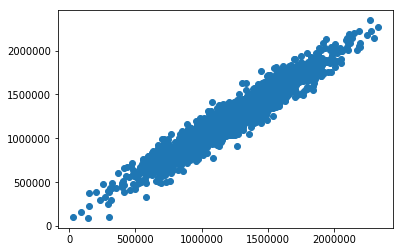

In [17]:
plt.scatter(y_test, predictions)

## Cross-validating your predictions


Now we have our predictions it is time to check how accurate these are by cross-validating.  
Let's start with importing the necessities.

In [18]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

Now we perform a 6-fold cross validation.

In [25]:
# Perform 6-fold cross validation
scores = cross_val_score(lm, X_test, y_test, cv=6)
print ('Cross-validated scores Linear Regression:', scores)
# Calculate the mean accuracy
np.mean(scores)

Cross-validated scores Linear Regression: [ 0.92173064  0.9175334   0.92208147  0.90192918  0.91156098  0.92589051]


0.91678769482931877

Our cross-validation score for Linear Regression is 0.917.  
Now let's see if we can predict housing prices better using another method, the Random Forest.

In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

We have now trained a Random Forest. Like Linear Regression, let's cross-validate and compare!

In [24]:
# Perform 6-fold cross validation
scores = cross_val_score(rf, X_test, y_test, cv=6)
print ('Cross-validated scores Random Forest:', scores)

Cross-validated scores Random Forest: [ 0.87458479  0.86948065  0.87137449  0.84688182  0.88253131  0.87062004]


Which method would you choose? The Linear Regression or the Random Forest? And why?